# Creación de un Data Lake
### Autor: Víctor Manuel Rodríguez Loyola
### ITESM CEM

## Materiales utilizados:
   * 3 o más Raspberry Pi model 3B+
   * 3 o más Tarjeta Micro SD de 32 Gb en adelante
   * 1 switch
   * 3 o más Cable Ethernet
   * 3 o más Fuente de alimentación con 2A de corriente de salida
   * 1 case para montar el cluster
   * 1 monitor, teclado y mouse
    
## Procedimiento

### Instalación de Raspberry Pi OS

El primer paso es verificar que sus tarjetas MicroSD estén formateadas.

Es recomendable hacer el formateo utilizando aplicaciones como **MicroSD Formatter**, disponible [en este enlace.](https://www.sdcard.org/downloads/formatter/)
    
Una vez formateadas todas las MicroSD, ingrese al sitio oficial de descargas de Raspberry Pi (https://www.raspberrypi.org/downloads/) y descargue **Noobs** en formato ZIP. 

Ya con Noobs descargado, conecte la MicroSD a su computadora y extraiga el archivo ZIP ahí. Posteriormente, desconecte la MicroSD y conéctela a una de las Raspberry Pi. 

Ahora, conecte el monitor, teclado, mouse y fuente de alimentación a la Raspberry Pi para comenzar con la instalación del sistema operativo. Espere unos segundos para que se reconozcan los archivos de la Micro SD.

#### Nota: Verifique que al momento de conectar su Raspberry Pi a la corriente, encienda un LED verde y uno rojo. El LED rojo indica que la Raspberry Pi está conectada a la corriente, y el LED verde indica que se está leyendo la MicroSD correctamente.

Deberá observar el **menú de instalación**. Seleccione el sistema operativo a instalar (en este caso Raspberry Pi OS o Raspbian), el idioma en que desee que se instale y presione el botón de _instalar_ en la parte superior izquierda. El proceso de instalación durará unos minutos, asegúrse de que la Raspberry Pi se mantenga conectada a la corriente.  

Una vez terminada la instalación, apague la Raspberry Pi y desconéctela de la corriente. Asegúrese de que el LED verde esté apagado antes de desconectar.

Este proceso de instalación se tiene que hacer para cada Raspberry Pi. Para evitar repetir este proceso, es posible clonar el contenido de la MicroSD mediante la creación de una **imagen**. Esto puede hacerse con aplicaciones como **Win32 Disk Imager**, disponible [en este enlace.](https://win32diskimager.download/)

Al clonar la MicroSD con Raspberry Pi OS instalado, únicamente tendrá que instalar la imagen el el resto de las tarjetas MicroSD y podrá arrancar todas las Raspberry Pi con el sistema operativo instalado. Después de hacer este proceso, verifique que el resto de las Raspberry Pi arranquen de forma correcta. 

### Configuraciones básicas

Para poder conectar las Raspberry Pi en el cluster es necesario realizar estas configuraciones en cada una de ellas: 

#### Cambiar el nombre del host
Cambiar el nombre del host nos ayudará a identificar más fácilmente a cada Raspberry Pi al momento de trabajar con el cluster, ya que por defecto tienen el nombre de _raspberrypi_.

Para cambiar el nombre del host, abra una terminal y teclee el comando  

```sudo nano /etc/hostname```


Se abrirá un archivo con el nombre actual del host. Reemplace el nombre. Una vez modificado _hostname_, presione Ctrl+O para guardar los cambios y Ctrl+X para salir del archivo. 

Puede comprobar que el nombre del host se modificó correctamente con el comando ```hostname```

En este caso se asignaron los nombres de host a las Raspberry Pi de la siguiente manera:
* master
* slave01
* slave02
* slave03

#### Establecer una dirección IP estática

Esto se hace accediendo al archivo _/etc/dhcpd.conf_ y buscando el apartado donde se encuentre la configuración de la interfaz Ethernet, normalmente mostrada como ```interface eth0```. Configure la dirección IP estática,así como las direcciones de Gateway y de DNS con los siguientes comandos:

```static ip_address=192.168.1.101/24```  

```static routers=192.168.1.254```  

```static domain_name_servers=192.168.1.1 8.8.8.8 fd51:42f8:caae:d92e::1```  

En este caso se asignaron las direcciones IP de la siguiente manera:

* master:  192.198.1.101/24
* slave01: 192.198.1.102/24
* slave02: 192.198.1.103/24
* slave03: 192.198.1.104/24

#### Agregar los otros host
Para trabajar con el cluster será necesario agregar los otros host que conformarán el mismo. 

Abra una terminal y teclee el comando
```sudo nano /etc/hosts```

En el archivo que se abre tendrá que añadir el nombre y la dirección IP de todos los host que conforman el cluster.

En este caso, la configuración quedó de la siguiente manera:

```192.198.1.101   master```  
```192.198.1.102   slave01```  
```192.198.1.103   slave02```  
```192.198.1.104   slave03```

#### Activar SSH
Para activar la interfaz SSH, navague hasta la configuración entrando a menú principal -> Preferencias -> Configuración de Raspberry Pi. 

Una vez dentro, vaya a la pestaña de Interfaces, localice la interfaz _SSH_ y asegúrese de que se encuentre activada. 


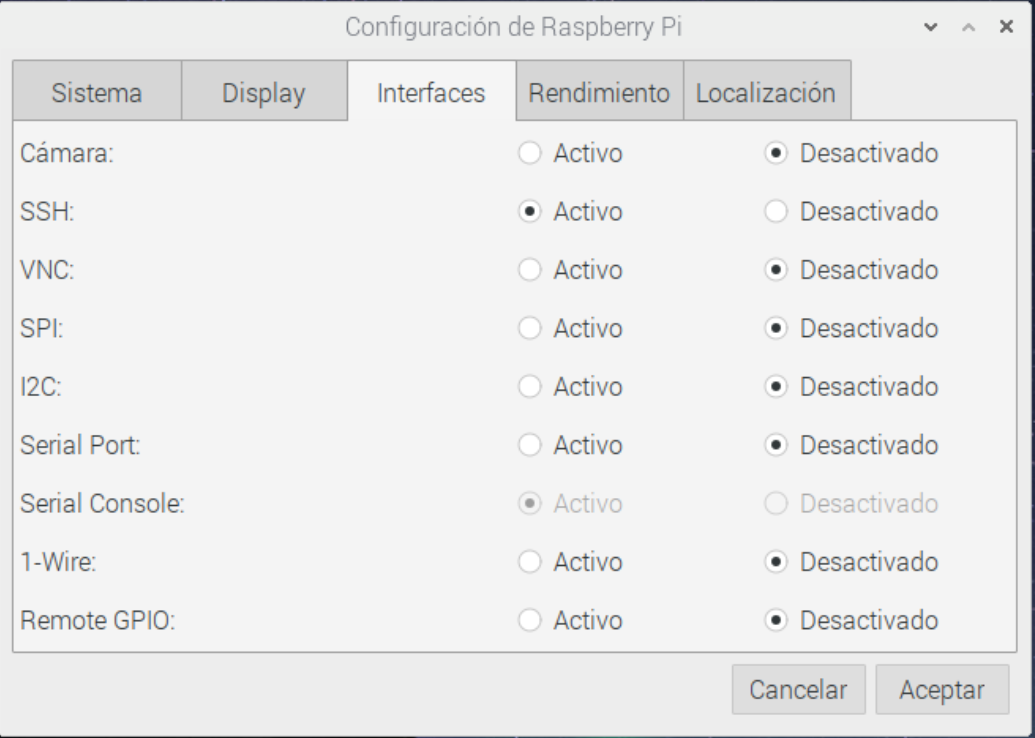